<a href="https://colab.research.google.com/github/gabgovar/Apache-Spark/blob/main/y_H2_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = [
    ['Sugar cane bagasse', 50.00],
    ['Sewage sludge', 18.40],
    ['Sugar cane straw waste', 31.30],
    ['Coffee waste', 8.88],
    ['Eucalyptus waste', 7.73],
    ['MSW', 49.16],
    ['Orange bagasse', 9.23],
    ['Corn waste', 60.29],
    # ["Microalgae", 5.22],
    # ["Palm fuit shell", 8.44],
    # ["Palm pits", 7.79],
    # ["Cotton husk", 6.90],
    # ["Cotton seed husk", 9.70],
    # ["Groundnut shell", 8.10],
    # ["Florest residue", 7.32],
    # ["Wheat strall", 8.30]
]

df_name = pd.DataFrame(data, columns=['biomass', 'Moisture'])

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Suponha que você tenha um dataframe chamado 'dados'
# Substitua esta linha pelo seu dataframe real
dadosH = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")

# dados = pd.merge(dadosH, df_name, on='Moisture', how='inner')

In [6]:
dadosH = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")

In [3]:
pd.set_option("display.max_columns", None)
dados.loc[(dados['y_H2'] > 0.449)].head()

,Unnamed: 0,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Temp_air,sb_ratio,m_CO,m_CO2,m_H2,m_CH4,m_N2,m_H2O,x_CO,x_CO2,x_H2,x_CH4,x_N2,x_H2O,n_CO,n_CO2,n_H2,n_CH4,n_N2,n_H2O,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O,LHV,HHV,mass_flow,mole_flow,Exergy_ph
0,127,760.0,50.00,14.32,83.54,2.14,46.70,6.02,0.17,0.02,44.95,400.0,0.60,41595.4758,45783.2282,6830.85028,2935.00862,7.649982,25276.9734,0.339751,0.373957,0.055794,0.023973,0.000062,0.206462,1485.00113,1040.296210,3388.52029,182.949107,0.273082,1403.08523,0.197997,0.138704,0.451795,0.024393,0.000036,0.187075,11315.6391,13214.3378,122429.186,7500.12506,1189.63145
8,119,760.0,50.00,14.32,83.54,2.14,46.70,6.02,0.17,0.02,44.95,450.0,0.60,41595.4758,45783.2282,6830.85028,2935.00862,7.649982,25276.9749,0.339751,0.373957,0.055794,0.023973,0.000062,0.206462,1485.00113,1040.296210,3388.52029,182.949107,0.273082,1403.08532,0.197997,0.138704,0.451795,0.024393,0.000036,0.187075,11315.6389,13214.3376,122429.188,7500.12514,1189.63142
16,111,760.0,18.40,7.60,64.90,27.50,33.90,6.30,5.88,0.67,25.50,400.0,0.60,54562.9780,42452.9210,9384.07710,7200.88527,432.908691,37758.7268,0.359458,0.279677,0.061822,0.047439,0.002852,0.248752,1947.95426,964.624265,4655.07724,448.855762,15.453585,2095.92784,0.192336,0.095244,0.459629,0.044319,0.001526,0.206946,13411.1524,15682.2826,151792.497,10127.89290,1834.02420
80,47,760.0,49.16,13.94,71.83,14.23,42.04,5.90,0.66,0.10,29.87,400.0,0.60,42812.5788,50077.6691,9358.99689,3107.55226,32.541911,48644.0777,0.277943,0.325109,0.060760,0.020175,0.000211,0.315802,1528.45296,1137.875410,4642.63592,193.704342,1.161652,2700.15663,0.149790,0.111513,0.454983,0.018983,0.000114,0.264618,11096.4970,13358.4277,154033.417,10203.98690,2972.94090
81,46,760.0,49.16,13.94,71.83,14.23,42.04,5.90,0.66,0.10,29.87,400.0,0.65,45974.3680,39116.4939,8033.12361,5292.71103,32.541918,25883.1978,0.369770,0.314612,0.064610,0.042569,0.000262,0.208177,1641.33208,888.813261,3984.92153,329.912748,1.161652,1436.73581,0.198160,0.107307,0.481104,0.039831,0.000140,0.173459,13605.6765,15810.2619,124332.436,8282.87707,1135.54345


In [77]:
# dados = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")



dadosN = dadosH[['T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air', 'sb_ratio', 'y_H2']]

# dadosN = dadosN[dadosN['Moisture'] == 18.40]

total_registros = dadosN.shape[0]
print("Número total de registros:", total_registros)

# Calcular a média e o desvio padrão da coluna "valor"
media = dadosN['y_H2'].mean()
desvio_padrao = dadosN['y_H2'].std()
# Definir um limite para identificar outliers (por exemplo, 2 desvios padrão)
limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 5 * desvio_padrao
# Filtrar os outliers e criar um novo dataframe limpo
dados_limpos = dadosN[(dadosN['y_H2'] >= limite_inferior) & (dadosN['y_H2'] <= limite_superior)]
# Visualizar o dataframe limpo
df = dados_limpos

Número total de registros: 13440


In [109]:
# # dados = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")



# dadosN = dadosH[['T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air', 'sb_ratio', 'y_H2']]

# # dadosN = dadosN[dadosN['Moisture'] == 18.40]

# total_registros = dadosN.shape[0]
# print("Número total de registros:", total_registros)

# # Calcular a média e o desvio padrão da coluna "valor"
# media = dadosN['y_H2'].mean()
# desvio_padrao = dadosN['y_H2'].std()
# # Definir um limite para identificar outliers (por exemplo, 2 desvios padrão)
# limite_superior = media + 2.5 * desvio_padrao
# limite_inferior = media - 2.5 * desvio_padrao
# # Filtrar os outliers e criar um novo dataframe limpo
# dados_limpos = dadosN[(dadosN['y_H2'] >= limite_inferior) & (dadosN['y_H2'] <= limite_superior)]
# # Visualizar o dataframe limpo

# Carregar seus dados do CSV
filtro = dados_limpos["y_H2"] > 0.36
df = dados_limpos[filtro]

# df = dadosN

# # Carregar o DataFrame (substitua 'seu_dataframe.csv' pelo nome do seu arquivo CSV)
# df = dadosN

# Aplicar a transformação logarítmica à variável alvo HHV
# df['log_exergia'] = np.log(df['exergia'])

# Divisão em conjuntos de treinamento e teste
X = df.drop(columns=['y_H2'])
y = df['y_H2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: Normalização (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df = pd.DataFrame(columns=['R2', 'MSE', 'N1', 'N2', 'LR'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

learning_rate = 0.01

# Construir o modelo de rede neural
model = keras.Sequential([
    keras.layers.Dense(17, activation='sigmoid', # 17, 5
                      #  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                      input_shape=(X_train_scaled.shape[1],)), #21
    keras.layers.Dense(5, activation='sigmoid'),
    keras.layers.Dense(1)  # Camada de saída para regressão
])

model.summary()

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilar o modelo
model.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)

# Fazer previsões usando o modelo
y_pred_log_scale = model.predict(X_test_scaled)
y_pred_log_scale_train = model.predict(X_train_scaled)

# Calcular o erro quadrático médio (MSE) nas previsões na escala logarítmica
mse_teste = mean_squared_error(y_test, y_pred_log_scale)
print(f'MSE nas previsões na escala logarítmica teste: {mse_teste}')

# Calcular o erro quadrático médio (MSE) nas previsões na escala logarítmica
mse_treino = mean_squared_error(y_train, y_pred_log_scale_train)
print(f'MSE nas previsões na escala logarítmica treino: {mse_treino}')

# Calcular o R² nas previsões na escala logarítmica
r2_teste = r2_score(y_test, y_pred_log_scale)
print(f'R² nas previsões na escala logarítmica_teste: {r2_teste}')

# Calcular o R² nas previsões na escala logarítmica
r2_treino = r2_score(y_train, y_pred_log_scale_train)
print(f'R² nas previsões na escala logarítmica treino: {r2_treino}')

# Aplicar a função inversa do logaritmo para obter as previsões na escala original
y_pred_original_scale_teste = np.exp(y_pred_log_scale)
y_pred_original_scale_treino = np.exp(y_pred_log_scale_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 17)                221       
                                                                 
 dense_16 (Dense)            (None, 5)                 90        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
318/318 [==============================] - 0s 1ms/step
MSE nas previsões na escala logarítmica teste: 1.2091628468518925e-05
MSE nas previsões na escala logarítmica treino: 1.2163044845860207e-05
R² nas previsões na escala logarítmica_teste: 0.9884986744701106
R² nas previsões na escala 

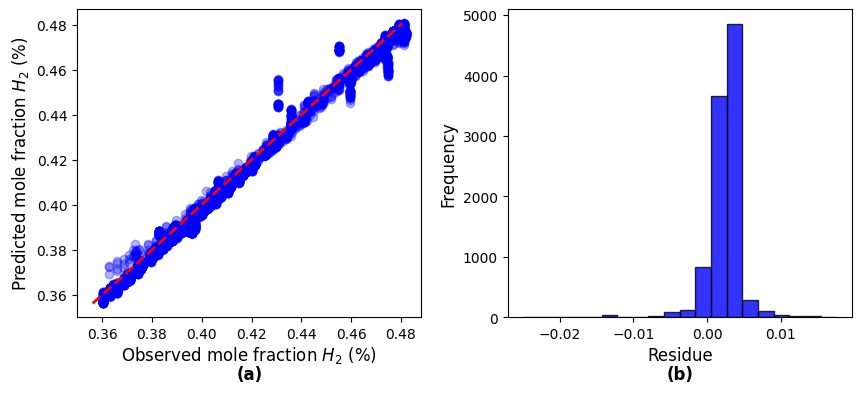

In [110]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
# Plotar as previsões
plt.plot([min(y_pred_log_scale_train), max(y_pred_log_scale_train)], [min(y_pred_log_scale_train), max(y_pred_log_scale_train)], color='red', linestyle='--', linewidth=2)
plt.scatter(y_train, y_pred_log_scale_train, color='blue', alpha=0.3)
plt.text(0.5, -0.2, '(a)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Observed mole fraction $H_{2}$ (%)', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Predicted mole fraction $H_{2}$ (%)', fontsize=12)

plt.subplot(1,2,2)

residuos = y_train - y_pred_log_scale_train.flatten()
# Plotar o histograma dos resíduos
plt.hist(residuos, bins=20, alpha=0.8, color='blue', edgecolor='k')
plt.text(0.5, -0.2, '(b)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Residue', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Frequency', fontsize=12)
plt.subplots_adjust(wspace=0.25)
plt.show()

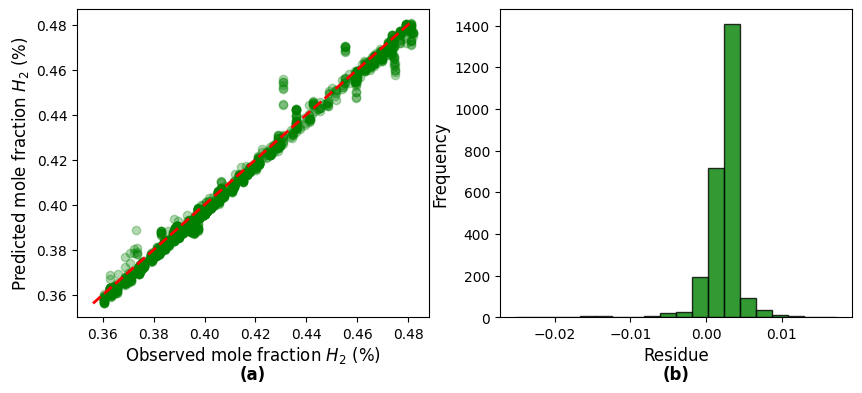

In [111]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
# Plotar as previsões
plt.plot([min(y_pred_log_scale), max(y_pred_log_scale)], [min(y_pred_log_scale), max(y_pred_log_scale)], color='red', linestyle='--', linewidth=2)
plt.scatter(y_test, y_pred_log_scale, color='green', alpha=0.3)
plt.text(0.5, -0.2, '(a)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Observed mole fraction $H_{2}$ (%)', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Predicted mole fraction $H_{2}$ (%)', fontsize=12)

plt.subplot(1,2,2)

residuos = y_test - y_pred_log_scale.flatten()
# Plotar o histograma dos resíduos
plt.hist(residuos, bins=20, alpha=0.8, color='green', edgecolor='k')
plt.text(0.5, -0.2, '(b)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Residue', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Frequency', fontsize=12)
plt.subplots_adjust(wspace=0.2)
plt.show()

In [112]:
y_pred_log_scale_all = model.predict(scaler.fit_transform(X))
# Calcular o erro quadrático médio (MSE) nas previsões na escala logarítmica
mse_teste = mean_squared_error(y, y_pred_log_scale_all)
print(f'MSE nas previsões na escala logarítmica teste: {mse_teste}')

# Calcular o erro quadrático médio (MSE) nas previsões na escala logarítmica
mse_treino = mean_squared_error(y, y_pred_log_scale_all)
print(f'MSE nas previsões na escala logarítmica treino: {mse_treino}')

# Calcular o R² nas previsões na escala logarítmica
r2_teste = r2_score(y, y_pred_log_scale_all)
print(f'R² nas previsões na escala logarítmica_teste: {r2_teste}')

y_pred_original_scale_all = np.exp(y_pred_log_scale_all)

397/397 [==============================] - 1s 1ms/step
MSE nas previsões na escala logarítmica teste: 1.2443982268042272e-05
MSE nas previsões na escala logarítmica treino: 1.2443982268042272e-05
R² nas previsões na escala logarítmica_teste: 0.9878959587988158


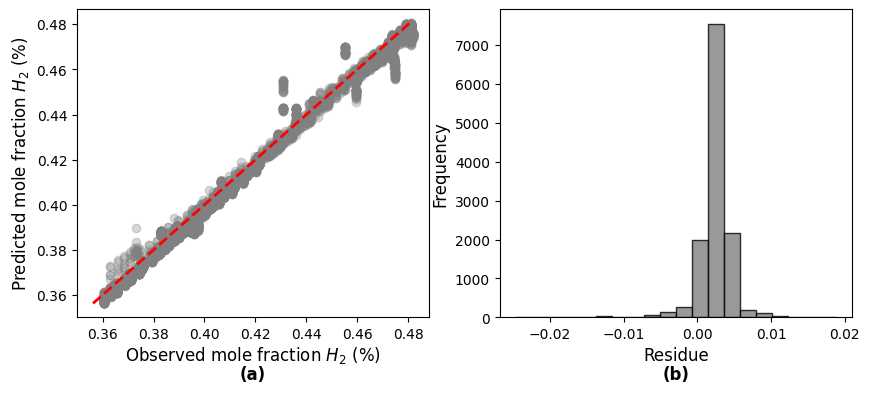

In [113]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
# Plotar as previsões
plt.plot([min(y_pred_log_scale_all), max(y_pred_log_scale_all)], [min(y_pred_log_scale_all), max(y_pred_log_scale_all)], color='red', linestyle='--', linewidth=2)
plt.scatter(y, y_pred_log_scale_all, color='gray', alpha=0.3)
plt.text(0.5, -0.2, '(a)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Observed mole fraction $H_{2}$ (%)', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Predicted mole fraction $H_{2}$ (%)', fontsize=12)

plt.subplot(1,2,2)

residuos = y - y_pred_log_scale_all.flatten()
# Plotar o histograma dos resíduos
plt.hist(residuos, bins=20, alpha=0.8, color='gray', edgecolor='k')
plt.text(0.5, -0.2, '(b)', fontsize=12, ha='center', transform=plt.gca().transAxes, fontweight='bold')
plt.text(0.5, -0.14, 'Residue', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.ylabel('Frequency', fontsize=12)
plt.subplots_adjust(wspace=0.2)
plt.show()

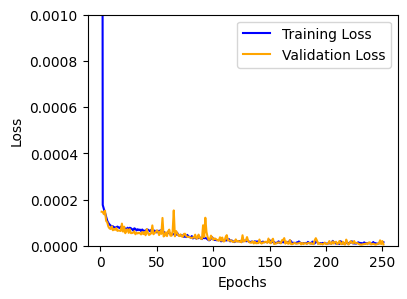

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

# Acesse os valores de loss e val_loss ao longo das épocas
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um array de épocas para o eixo x
epochs = range(1, len(loss) + 1)

# Plote a curva de loss em azul e a curva de val_loss em laranja
plt.figure(figsize=(4, 3))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')

# Defina os limites do eixo y de acordo com sua preferência
plt.ylim(0, 0.001)  # Altere os valores de limite conforme necessário

# plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  # Atualize o rótulo do eixo y
plt.legend()

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/pasta_dados/modelo_H2_asme/H5/meu_modelo_h2.h5")
modelo_carregado = tf.keras.models.load_model("/content/drive/MyDrive/pasta_dados/modelo_H2_asme/H5/meu_modelo_h2.h5")
# Dados de entrada para previsão (substitua isso pelos seus próprios dados)
input_data = np.array([[890.0, 15.98, 19.4, 72.9,	0.8,	46.6,	7.10,	0.32, 0, 41.8, 400.0, 0.5]])

# 870.0, 50.0, 14.32, 83.54, 2.14, 46.7, 6.02, 0.17, 0.02, 44.95, 400.0, 0.6



# T                    950.000000
# Moisture               7.730000
# Fixed_Carbon          16.380000
# Volatile_Material     74.910000
# Ash                    0.980000
# Carbon                48.650000
# Hydrogen               6.160000
# Nitrogen               0.280000
# Sulfur                 0.000000
# Oxygen                44.910000
# Temp_air             425.000000
# sb_ratio               0.600000
# y_H2                   0.391172

# Realize a previsão
predictions = modelo_carregado.predict(input_data)

# As previsões são retornadas como um array NumPy
print("Previsões:", predictions)

1/1 [==============================] - 0s 89ms/step
Previsões: [[0.54615283]]


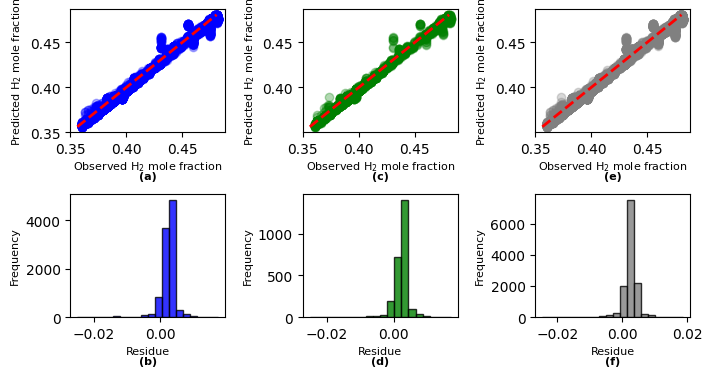

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Seus dados aqui

fig, axes = plt.subplots(2, 3, figsize=(8, 4))

# Gráfico 1
axes[0, 0].plot([np.log(min(y_pred_original_scale_treino)), np.log(max(y_pred_original_scale_treino))], [np.log(min(y_pred_original_scale_treino)), np.log(max(y_pred_original_scale_treino))], color='red', linestyle='--', linewidth=2)
axes[0, 0].scatter(y_train, np.log(y_pred_original_scale_treino), color='blue', alpha=0.3)
axes[0, 0].text(0.5, -0.38, '(a)', fontsize=8, ha='center', transform=axes[0, 0].transAxes, fontweight='bold')
axes[0, 0].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 0].transAxes)
axes[0, 0].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 3
axes[0, 1].plot([np.log(min(y_pred_original_scale_teste)), np.log(max(y_pred_original_scale_teste))], [np.log(min(y_pred_original_scale_teste)), np.log(max(y_pred_original_scale_teste))], color='red', linestyle='--', linewidth=2)
axes[0, 1].scatter(y_test, np.log(y_pred_original_scale_teste), color='green', alpha=0.3)
axes[0, 1].text(0.5, -0.38, '(c)', fontsize=8, ha='center', transform=axes[0, 1].transAxes, fontweight='bold')
axes[0, 1].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 1].transAxes)
axes[0, 1].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 4
axes[0, 2].plot([np.log(min(y_pred_original_scale_all)), np.log(max(y_pred_original_scale_all))], [np.log(min(y_pred_original_scale_all)), np.log(max(y_pred_original_scale_all))], color='red', linestyle='--', linewidth=2)
axes[0, 2].scatter(y, np.log(y_pred_original_scale_all), color='gray', alpha=0.3)
axes[0, 2].text(0.5, -0.38, '(e)', fontsize=8, ha='center', transform=axes[0, 2].transAxes, fontweight='bold')
axes[0, 2].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 2].transAxes)
axes[0, 2].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 2
residuos = y_train - y_pred_log_scale_train.flatten()
axes[1, 0].hist(residuos, bins=20, alpha=0.8, color='blue', edgecolor='k')
axes[1, 0].text(0.5, -0.38, '(b)', fontsize=8, ha='center', transform=axes[1, 0].transAxes, fontweight='bold')
axes[1, 0].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 0].transAxes)
axes[1, 0].set_ylabel('Frequency', fontsize=8)

# Gráfico 4
residuos = y_test - y_pred_log_scale.flatten()
axes[1, 1].hist(residuos, bins=20, alpha=0.8, color='green', edgecolor='k')
axes[1, 1].text(0.5, -0.38, '(d)', fontsize=8, ha='center', transform=axes[1, 1].transAxes, fontweight='bold')
axes[1, 1].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 1].transAxes)
axes[1, 1].set_ylabel('Frequency', fontsize=8)

# Gráfico 6
residuos = y - y_pred_log_scale_all.flatten()
axes[1, 2].hist(residuos, bins=20, alpha=0.8, color='gray', edgecolor='k')
axes[1, 2].text(0.5, -0.38, '(f)', fontsize=8, ha='center', transform=axes[1, 2].transAxes, fontweight='bold')
axes[1, 2].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 2].transAxes)
axes[1, 2].set_ylabel('Frequency', fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


# Randon forest

In [15]:
dadosN.columns

Index(['T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash', 'Carbon',
       'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air', 'sb_ratio',
       'y_H2'],
      dtype='object')

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar seus dados do CSV
filtro = dados_limpos["y_H2"] > 0.36
data = dados_limpos[filtro]

# Separar variáveis de entrada e saída
X = data.iloc[:, 0:11]  # Colunas 2 a 13 para variáveis de entrada
y = data['y_H2']    # Coluna 43 como variável alvo

# Dividir os dados em treino e teste (apenas para fins de visualização)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de Random Forest com hiperparâmetros ajustados
random_forest = RandomForestRegressor(
    n_estimators=20,
    max_depth=29,
    min_samples_split=4,
    min_samples_leaf=7
    # Você pode adicionar mais hiperparâmetros aqui conforme necessário
)

# Realizar validação cruzada
scores = cross_val_score(random_forest, X, y, cv=10, scoring='r2')

print(f"R-squared Scores (CV): {scores}")
print(f"Mean R-squared Score (CV): {scores.mean()}")

# Treinar o modelo com todos os dados
random_forest.fit(X, y)

# Fazer previsões no conjunto de teste
train_predictions = random_forest.predict(X_train)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print(f"Mean Squared Error (Train Set): {mse}")
print(f"R-squared Score (Train Set): {r2}")

# Fazer previsões no conjunto de teste
test_predictions = random_forest.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared Score (Test Set): {r2}")

# Fazer previsões no conjunto de teste
all_predictions = random_forest.predict(X)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y, all_predictions)
r2 = r2_score(y, all_predictions)

print(f"Mean Squared Error (All Set): {mse}")
print(f"R-squared Score (All Set): {r2}")

R-squared Scores (CV): [0.90856123 0.90289418 0.9112883  0.90136902 0.88746027 0.63032172
 0.63151132 0.63193309 0.62955027 0.63233185]
Mean R-squared Score (CV): 0.766722123762248
Mean Squared Error (Train Set): 0.00011703981117986372
R-squared Score (Train Set): 0.8853923411785098
Mean Squared Error (Test Set): 0.00011748295383817011
R-squared Score (Test Set): 0.8874622110378574
Mean Squared Error (All Set): 0.00011717275397735564
R-squared Score (All Set): 0.886028137034523


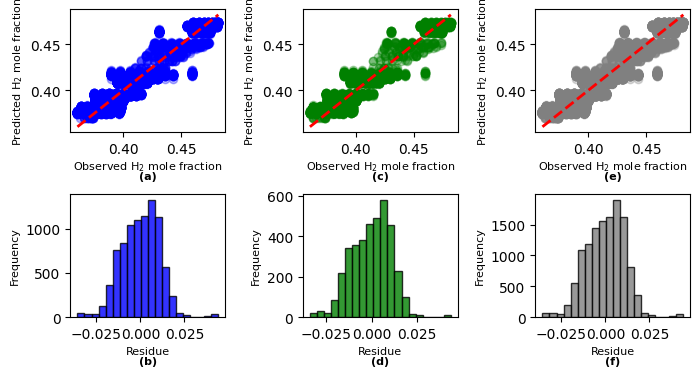

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

# Gráfico 1
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
axes[0, 0].scatter(y_train, train_predictions, color='blue', alpha=0.3)
axes[0, 0].text(0.5, -0.38, '(a)', fontsize=8, ha='center', transform=axes[0, 0].transAxes, fontweight='bold')
axes[0, 0].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 0].transAxes)
axes[0, 0].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 3
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axes[0, 1].scatter(y_test, test_predictions, color='green', alpha=0.3)
axes[0, 1].text(0.5, -0.38, '(c)', fontsize=8, ha='center', transform=axes[0, 1].transAxes, fontweight='bold')
axes[0, 1].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 1].transAxes)
axes[0, 1].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 5
axes[0, 2].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
axes[0, 2].scatter(y, all_predictions, color='gray', alpha=0.3)
axes[0, 2].text(0.5, -0.38, '(e)', fontsize=8, ha='center', transform=axes[0, 2].transAxes, fontweight='bold')
axes[0, 2].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 2].transAxes)
axes[0, 2].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 2
residuos_train = y_train - train_predictions
axes[1, 0].hist(residuos_train, bins=20, alpha=0.8, color='blue', edgecolor='k')
axes[1, 0].text(0.5, -0.38, '(b)', fontsize=8, ha='center', transform=axes[1, 0].transAxes, fontweight='bold')
axes[1, 0].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 0].transAxes)
axes[1, 0].set_ylabel('Frequency', fontsize=8)

# Gráfico 4
residuos_test = y_test - test_predictions
axes[1, 1].hist(residuos_test, bins=20, alpha=0.8, color='green', edgecolor='k')
axes[1, 1].text(0.5, -0.38, '(d)', fontsize=8, ha='center', transform=axes[1, 1].transAxes, fontweight='bold')
axes[1, 1].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 1].transAxes)
axes[1, 1].set_ylabel('Frequency', fontsize=8)

# Gráfico 6
residuos_all = y - all_predictions
axes[1, 2].hist(residuos_all, bins=20, alpha=0.8, color='gray', edgecolor='k')
axes[1, 2].text(0.5, -0.38, '(f)', fontsize=8, ha='center', transform=axes[1, 2].transAxes, fontweight='bold')
axes[1, 2].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 2].transAxes)
axes[1, 2].set_ylabel('Frequency', fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar seus dados do CSV
filtro = dados_limpos["y_H2"] > 0.36
data = dados_limpos[filtro]

# Separar variáveis de entrada e saída
X = data.iloc[:, 0:11]  # Colunas 2 a 13 para variáveis de entrada
y = data['y_H2']    # Coluna 43 como variável alvo

# Dividir os dados em treino e teste (apenas para fins de visualização)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(
    # n_estimators=100,
    learning_rate=0.1,
    # max_depth=100,
    random_state=42
    # Outros hiperparâmetros conforme necessário
)

# Realizar validação cruzada
# scores = cross_val_score(gradient_boosting, X, y, cv=10, scoring='r2')
# print(f"R-squared Scores (CV): {scores}")
# print(f"Mean R-squared Score (CV): {scores.mean()}")

# Treinar o modelo com todos os dados
gradient_boosting.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
gtrain_predictions = gradient_boosting.predict(X_train)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_train, gtrain_predictions)
r2 = r2_score(y_train, gtrain_predictions)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared Score (Test Set): {r2}")

# Fazer previsões no conjunto de teste
gtest_predictions = gradient_boosting.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, gtest_predictions)
r2 = r2_score(y_test, gtest_predictions)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared Score (Test Set): {r2}")

# Fazer previsões no conjunto total
gall_predictions = gradient_boosting.predict(X)

# Avaliar o desempenho do modelo nos dados totais
mse = mean_squared_error(y, gall_predictions)
r2 = r2_score(y, gall_predictions)

print(f"Mean Squared Error (All Set): {mse}")
print(f"R-squared Score (All Set): {r2}")


Mean Squared Error (Test Set): 0.00011735071063075104
R-squared Score (Test Set): 0.8850879023910931
Mean Squared Error (Test Set): 0.00012061536990862353
R-squared Score (Test Set): 0.8844616465545716
Mean Squared Error (All Set): 0.00011833010841411278
R-squared Score (All Set): 0.8849023988676616


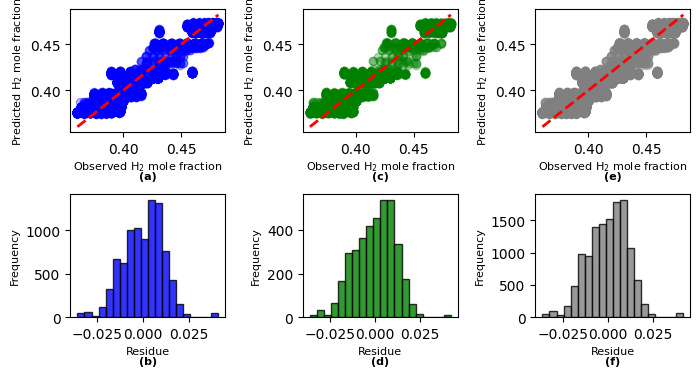

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

# Gráfico 1
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
axes[0, 0].scatter(y_train, gtrain_predictions, color='blue', alpha=0.3)
axes[0, 0].text(0.5, -0.38, '(a)', fontsize=8, ha='center', transform=axes[0, 0].transAxes, fontweight='bold')
axes[0, 0].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 0].transAxes)
axes[0, 0].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 3
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axes[0, 1].scatter(y_test, gtest_predictions, color='green', alpha=0.3)
axes[0, 1].text(0.5, -0.38, '(c)', fontsize=8, ha='center', transform=axes[0, 1].transAxes, fontweight='bold')
axes[0, 1].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 1].transAxes)
axes[0, 1].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 5
axes[0, 2].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
axes[0, 2].scatter(y, gall_predictions, color='gray', alpha=0.3)
axes[0, 2].text(0.5, -0.38, '(e)', fontsize=8, ha='center', transform=axes[0, 2].transAxes, fontweight='bold')
axes[0, 2].text(0.5, -0.30, r'Observed H$_{2}$ mole fraction', fontsize=8, ha='center', transform=axes[0, 2].transAxes)
axes[0, 2].set_ylabel(r'Predicted H$_{2}$ mole fraction', fontsize=8)

# Gráfico 2
residuos_train = y_train - gtrain_predictions
axes[1, 0].hist(residuos_train, bins=20, alpha=0.8, color='blue', edgecolor='k')
axes[1, 0].text(0.5, -0.38, '(b)', fontsize=8, ha='center', transform=axes[1, 0].transAxes, fontweight='bold')
axes[1, 0].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 0].transAxes)
axes[1, 0].set_ylabel('Frequency', fontsize=8)

# Gráfico 4
residuos_test = y_test - gtest_predictions
axes[1, 1].hist(residuos_test, bins=20, alpha=0.8, color='green', edgecolor='k')
axes[1, 1].text(0.5, -0.38, '(d)', fontsize=8, ha='center', transform=axes[1, 1].transAxes, fontweight='bold')
axes[1, 1].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 1].transAxes)
axes[1, 1].set_ylabel('Frequency', fontsize=8)

# Gráfico 6
residuos_all = y - gall_predictions
axes[1, 2].hist(residuos_all, bins=20, alpha=0.8, color='gray', edgecolor='k')
axes[1, 2].text(0.5, -0.38, '(f)', fontsize=8, ha='center', transform=axes[1, 2].transAxes, fontweight='bold')
axes[1, 2].text(0.5, -0.30, 'Residue', fontsize=8, ha='center', transform=axes[1, 2].transAxes)
axes[1, 2].set_ylabel('Frequency', fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()